# Running an EnergyPlus simulation on the 1ZoneUncontrolled file

## 1. Introduction

This notebook shows how to use the [`runsim`] function within the [eprun package] to run an EnergyPlus simulation. It uses the **'1ZoneUncontrolled.idf'** file in the EnergyPlus example files.

[`runsim`]: https://eprun.readthedocs.io/en/latest/runsim_function.html
[eprun package]: https://eprun.readthedocs.io/en/latest/index.html

## 2. Setup

### 2.1 Module imports

This imports the `runsim` function from the eprun package, as well as the [os package](https://docs.python.org/3/library/os.html) for working with files.


In [1]:
from eprun import runsim
import os

### 2.2 Simulation input files

A directory named **'input_files'** has been created in the same directory as this notebook. An .idf and .epw file have been placed in the **input_files** directory. These are the input files for the EnergyPlus simulation.

* The **'1ZoneUncontrolled.idf'** file is provided in the 'ExampleFiles' directory in the EnergyPlus install directory and represents the model inputs for a single zone, heated building.

* The **'USA_CO_Golden-NREL.724666_TMY3.epw'** file is an EnergyPlus weather file and is provided in the 'WeatherData' folder in the EnergyPlus install directory.

In [2]:
for file_name in os.listdir('input_files'):
    print(file_name)

1ZoneUncontrolled.idf
USA_CO_Golden-NREL.724666_TMY3.epw


### 2.3 Simulation directory for output files

A directory named **'simulation_files'** has been created in the same directory as this notebook. This will hold the simulation results.

In [3]:
'simulation_files' in os.listdir()

True

## 3. Simulation run

The `runsim` function is used to run the EnergyPlus simulation. The code below runs a simulation and returns an [`EPResult`] object.

[`EPResult`]: https://eprun.readthedocs.io/en/latest/EPResult_class.html

In [5]:
epresult=runsim(
    ep_dir='C:\EnergyPlusV9-6-0',
    input_filepath=r'input_files\1ZoneUncontrolled.idf',
    epw_filepath=r'input_files\USA_CO_Golden-NREL.724666_TMY3.epw',
    sim_dir='simulation_files'
)
print(type(epresult))

<class 'eprun.eprun.EPResult'>


## 4. Checking for run success

The simulation run was a success as the `returncode` property of the [`EPResult`] object is '0'. An unsuccessful run would have a `returncode` of '1'.

[`EPResult`]: https://eprun.readthedocs.io/en/latest/EPResult_class.html

In [6]:
epresult.returncode

0

## 5. Viewing the simulation CommandPrompt text

When an EnergyPlus simulation is run in the CommandPrompt it produces a stream of text as it runs through the stages of the simulation. This text can be viewed by using the `stdout` property of the [`EPResult`] object.

[`EPResult`]: https://eprun.readthedocs.io/en/latest/EPResult_class.html

In [7]:
print(epresult.stdout)

EnergyPlus Starting
EnergyPlus, Version 9.6.0-f420c06a69, YMD=2022.03.09 05:55
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation
Reporting Surfaces
Beginning Primary Simulation
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Warming up {17}
Warming up {18}
Warming up {19}
Warming up {20}
Warming up {21}
Warming up {22}
Starting Simulation at 12/21 for DENVER CENTENNIAL  GOLDEN   N ANN HTG 99% CONDNS DB
Initializing New Environment Parameters
Warming up {1}
Warming up {2}
Warming up {3}
Warming up {4}
Warming up {5}
Warming up {6}
Warming up {7}
Warming up {8}
Warming up {9}
Warming up {10}
Warming up {11}
Warming up {12}
Warming up {13}
Warming up {14}
Warming up {15}
Warming up {16}
Starting Simulation at 

## 6. Checking the output files

The output files of the simulation run are placed in the **simulation_files** directory.

In [8]:
for file_name in os.listdir('simulation_files'):
    print(file_name)

eplusout.audit
eplusout.bnd
eplusout.dxf
eplusout.eio
eplusout.end
eplusout.err
eplusout.eso
eplusout.mdd
eplusout.mtd
eplusout.mtr
eplusout.rdd
eplusout.shd
eplustbl.csv
eplustbl.htm
eplustbl.tab
eplustbl.txt
eplustbl.xml


## 7. Viewing the results

The [`EPResult`] object contains methods to view, plot and export the results of the simulation.

For example, the code below plots a graph of the **hourly zone mean air temperature** in the zone **'ZONE ONE'** over the 12 month simulation period:

[`EPResult`]: https://eprun.readthedocs.io/en/latest/EPResult_class.html

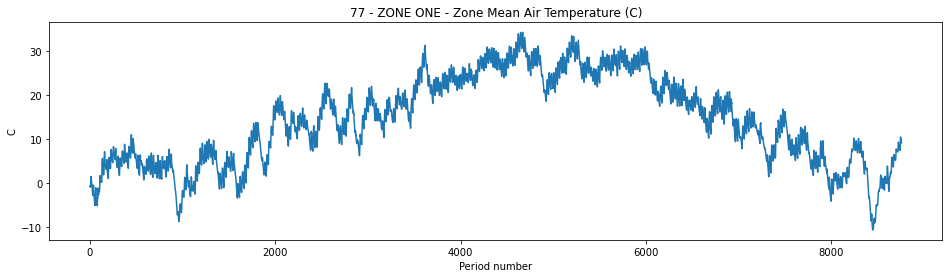

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
ax=epresult.get_eso().get_environment('RUN PERIOD 1').get_interval_variable(77).plot()

## 8. More details

For more details on viewing the results of simulations, see the [Viewing the results of the 1ZoneUncontrolled simulation run] Jupyter Notebook.

[Viewing the results of the 1ZoneUncontrolled simulation run]: https://nbviewer.jupyter.org/github/stevenkfirth/eprun/blob/main/examples/Viewing%20the%20results%20of%20the%201ZoneUncontrolled%20simulation%20run/Viewing%20the%20results%20of%20the%201ZoneUncontrolled%20simulation%20run.ipynb